In [59]:
from matplotlib import pyplot as plt
import pandas as pd
import os

in_file = os.path.join("Animal_Shelter_Final.csv")
final_df = pd.read_csv(in_file)
# final_df[final_df["color_primary"]=="Blue"].groupby("breed").count().sort_values("animal_id", ascending=False)
final_df.head(1)

,animal_id,name,datetime,found_location,type,intake_condition,sex,age,breed,color_primary,color_secondary,num_stays,avg_stay_len
0,A200922,Carlos,2013-10-03 15:47:00,Austin (TX),Owner Surrender,Normal,Neutered Male,16 years,Dachshund Mix,Black,Tan,1,49.0


In [99]:
color_dict = {
    "Black":"#000000",
    "White":"#FFFFFF",
    "Brown":"#8B4513",
    "Tan":"#D2B48C",
    "Blue":"#B0C4DE",
    "Red":"#A52A2A",
    "Gray":"#808080",
    "Yellow":"#FAFAD2",
    "Tricolor":"#DCDCDC",
    "Pink":"#FF69B4"
}

In [206]:
avg_stay_by_color = final_df.groupby("color_primary").mean().sort_values("avg_stay_len", ascending=False)
num_stay_by_color = final_df.groupby("color_primary").count()
color_order = list(avg_stay_by_color.index) + ["Pink"]

In [221]:
# determine scale factor

def get_scale_factor(stay_df, num_df, colors, total_dogs):

    max_len_stay = stay_df["avg_stay_len"].max()

    max_len_stay_weighted = []
    for color in colors:
        max_len_stay_weighted.append(
            weighted_by_color(
                stay_df.loc[color]["avg_stay_len"], 
                num_df.loc[color]["avg_stay_len"], 
                total_dogs
            )
        )
    
    return max_len_stay/max(max_len_stay_weighted)
    
    

scale_factor_primary = get_scale_factor(avg_stay_by_color, num_stay_by_color, color_order[:-1], len(final_df))
scale_factor_secondary = get_scale_factor(avg_stay_by_color_2nd, num_stay_by_color_2nd, color_order[:-1], len(final_df))

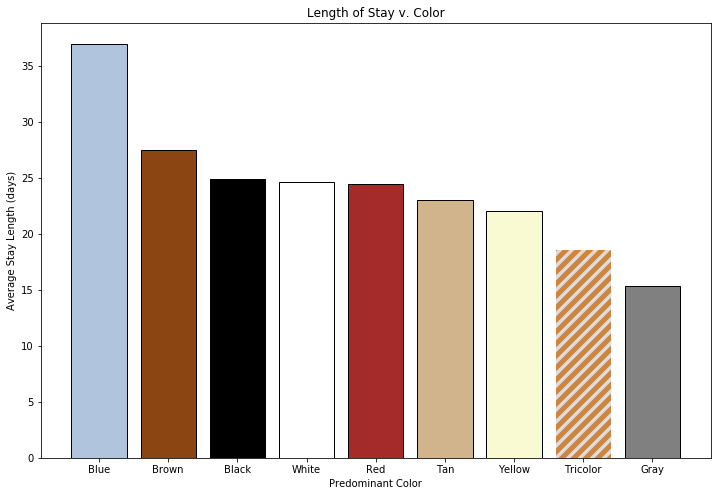

In [101]:
plt.title("Length of Stay v. Color")
plt.xlabel("Predominant Color")
plt.ylabel("Average Stay Length (days)")

plt.rcParams["figure.figsize"] = (12, 8)

for color in list(avg_stay_by_color.index):
    if color == "Tricolor": 
        plt.rcParams["hatch.linewidth"] = 5
        plt.rcParams['hatch.color'] = "#CD853F"
        
        plt.bar(color, 
                avg_stay_by_color.loc[color]["avg_stay_len"],
                color = color_dict[color], 
                hatch="//", 
                linewidth=2, 
                ecolor="#000000")
        
    elif color == "White":
        plt.bar(color, 
                avg_stay_by_color.loc[color]["avg_stay_len"],
                color = color_dict[color], 
                edgecolor="#000000")
    else:
        plt.bar(color, 
                avg_stay_by_color.loc[color]["avg_stay_len"],
                color = color_dict[color], 
                edgecolor="#000000")
plt.show()
# final_df_by_color

In [222]:
def plot_bars(df, ax, color_order, color_dict, scale_factor=1, weighted=False,*, num_df=[], total_dogs=[]):   
    
    if weighted:
        
        for color in color_order:
        
            if color == "Tricolor": 
                plt.rcParams["hatch.linewidth"] = 5
                plt.rcParams['hatch.color'] = "#CD853F"
                ax.bar(color,
                       weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                       color = color_dict[color], 
                       hatch="//", 
                       linewidth=2, 
                       ecolor=color_dict["Black"]
                      )
        
            elif color == "White":
                ax.bar(color, 
                       weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                       color = color_dict[color], 
                       edgecolor=color_dict["Black"]
                      )
                
            else:
                try:
                    ax.bar(color,
                           weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
                except KeyError:
                    ax.bar(color,
                           0,
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
    
    else:
        for color in color_order:
        
            if color == "Tricolor": 
                plt.rcParams["hatch.linewidth"] = 5
                plt.rcParams['hatch.color'] = "#CD853F"
                ax.bar(color, 
                       df.loc[color]["avg_stay_len"],
                       color = color_dict[color], 
                       hatch="//", 
                       linewidth=2, 
                       ecolor=color_dict["Black"]
                      )
        
            elif color == "White":
                ax.bar(color, 
                       df.loc[color]["avg_stay_len"],
                       color = color_dict[color], 
                       edgecolor=color_dict["Black"]
                      )
                
            else:
                try:
                    ax.bar(color, 
                           df.loc[color]["avg_stay_len"],
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
                except KeyError:
                    ax.bar(color, 
                           0,
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
            
# plot_bars(avg_stay_by_color, ax, color_dict, primary=True)
# plot_bars(avg_stay_by_color_2nd, ax, color_dict, primary=False)

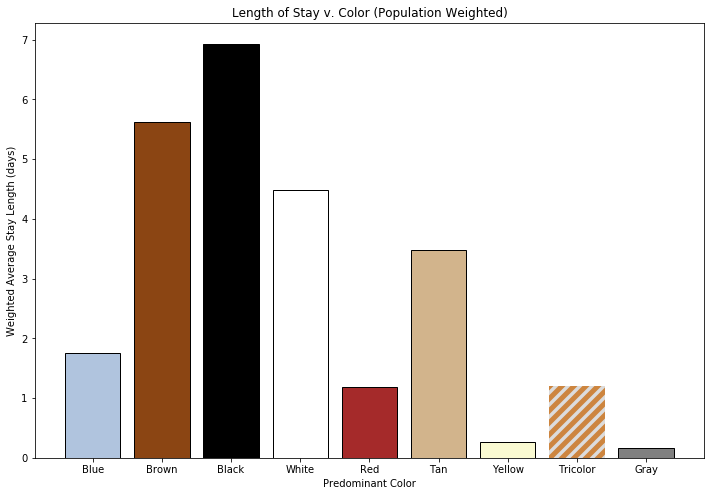

In [93]:
plt.title("Length of Stay v. Color (Population Weighted)")
plt.xlabel("Predominant Color")
plt.ylabel("Weighted Average Stay Length (days)")


for color in list(avg_stay_by_color.index):
    if color == "Tricolor": 
        plt.rcParams["hatch.linewidth"] = 5
        plt.rcParams['hatch.color'] = "#CD853F"
        
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color.loc[color]["avg_stay_len"], num_stay_by_color.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                hatch="//", 
                linewidth=2, 
                ecolor=color_dict["Black"])
        
    elif color == "White":
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color.loc[color]["avg_stay_len"], num_stay_by_color.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                edgecolor=color_dict["Black"])
    else:
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color.loc[color]["avg_stay_len"], num_stay_by_color.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                edgecolor=color_dict["Black"])
plt.show()
# final_df_by_color

In [209]:
def weighted_by_color(stay_len, num_dogs, total_dogs, scale = 1):
    return scale*stay_len*num_dogs/total_dogs

In [162]:
avg_stay_by_color_2nd = final_df.groupby("color_secondary").mean()
num_stay_by_color_2nd = final_df.groupby("color_secondary").count()

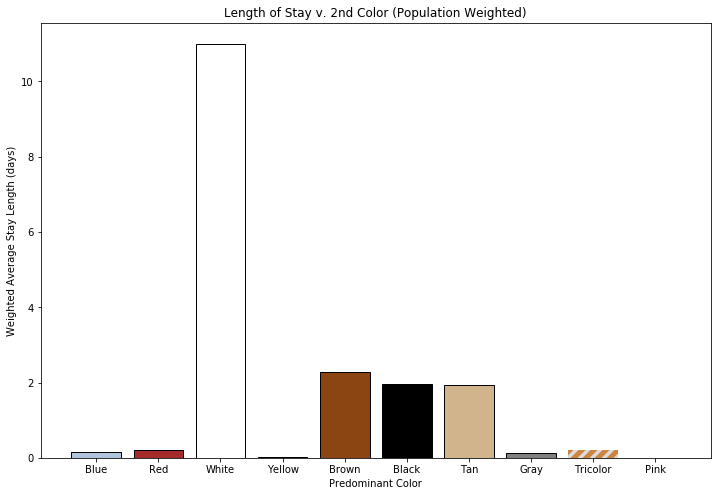

In [100]:
plt.title("Length of Stay v. 2nd Color (Population Weighted)")
plt.xlabel("Predominant Color")
plt.ylabel("Weighted Average Stay Length (days)")


for color in list(avg_stay_by_color_2nd.index):
    if color == "Tricolor": 
        plt.rcParams["hatch.linewidth"] = 5
        plt.rcParams['hatch.color'] = "#CD853F"
        
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color_2nd.loc[color]["avg_stay_len"], num_stay_by_color_2nd.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                hatch="//", 
                linewidth=2, 
                ecolor=color_dict["Black"])
        
    elif color == "White":
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color_2nd.loc[color]["avg_stay_len"], num_stay_by_color_2nd.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                edgecolor=color_dict["Black"])
    else:
        plt.bar(color, 
                weighted_by_color(avg_stay_by_color_2nd.loc[color]["avg_stay_len"], num_stay_by_color_2nd.loc[color]["avg_stay_len"], len(final_df)),
                color = color_dict[color], 
                edgecolor=color_dict["Black"])
plt.show()

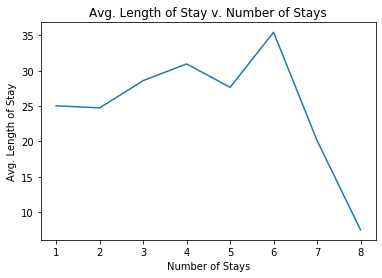

In [79]:
num_stay_df = final_df.groupby("num_stays").mean().sort_values("num_stays", ascending=False)
# print(num_stay_df)
plt.title("Avg. Length of Stay v. Number of Stays")
plt.xlabel("Number of Stays")
plt.ylabel("Avg. Length of Stay")

plt.plot(num_stay_df.index, num_stay_df)
plt.show()

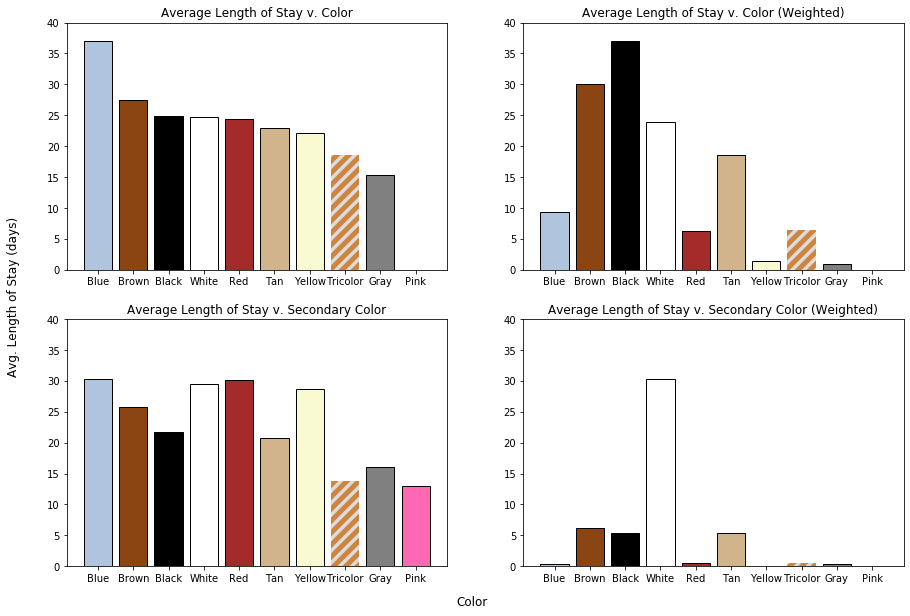

In [223]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))
ylim=[0, 40]
ylim_weighted = [0, 12]

fig.text(0.5, 0.07, 'Color', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'Avg. Length of Stay (days)', va='center', rotation='vertical', fontsize=12)

ax1[0].set_title("Average Length of Stay v. Color")
ax1[0].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[0], color_order, color_dict)

ax1[1].set_title("Average Length of Stay v. Color (Weighted)")
ax1[1].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[1], color_order, color_dict, scale_factor_primary, weighted=True, num_df=num_stay_by_color, total_dogs=len(final_df))

ax2[0].set_title("Average Length of Stay v. Secondary Color")
ax2[0].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[0], color_order, color_dict)

ax2[1].set_title("Average Length of Stay v. Secondary Color (Weighted)")
ax2[1].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[1], color_order, color_dict, scale_factor_secondary, weighted=True, num_df=num_stay_by_color_2nd, total_dogs=len(final_df))